<a href="https://colab.research.google.com/github/WlandGLL/Analise-de-dados-de-diabetes/blob/main/Projeto_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Análise de dados de diabetes***
##**1.Introdução.**

O objetivo esse projeto é fazer uma análise de uma base de dados sobre diabetes, das mulheres da população Pima(uma comunidade indígena norte-americana). Assim, é possível entender os fatores que influenciam na ocorrência da diabetes tipo 2, e com isso, vamos criar um modelo de aprendizado de máquina para prever a ocorrência da doença. A base está disponibilizada no kaggle, e possui 768 linhas e 9 colunas.
##**Os dados**




*   **Pregnancies**: números de gravidez.

*   **Glucose**: Nível de glicose.
*   **BloodPressure**: Pressão arterial diastólica.

*   **SkinThikness**: Espessura da prega cutânea.
*   **Insulin**: Nível de insulina

*   **BMI**: Índice de massa corporal.


*   **DiabetesPedigreeFunction**:Função de pedigree de diabetes, um índice que estima o risco genético de diabetes tipo 2 de uma pessoa com base no histórico familiar.


*   **Age**: Idade.

*  **Outcome**: Se o paciente possue diabetes (1), se não (0).









##**2.Carregamentos dos dados.**
Nesta etapa vamos carregar o dataset no ambiente e realizar uma inspeção inicial, para entender sua estrutura e validar a informação de que ele possui 768 linhas e 9 colunas.  
Também vamos visualizar as primeiras linhas da base e verificar os tipos de dados de cada coluna.

In [ ]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
print("Formato do dataset:")
print(f"Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")

# Mostrando as primeiras linhas
print("\nPrimeiras linhas do dataset:")
display(df.head())

# Informações gerais sobre os dados
print("\nInformações sobre as colunas:")
df.info()

Formato do dataset:
Linhas: 768, Colunas: 9

Primeiras linhas do dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Informações sobre as colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Obs: As informações sobre o número de colunas e linhas foram validadas, além do mais, percebe-se que não há valores nulos(NaN) nessa base. Outra coisa importanta a ser notada, é que todas as colunas são de tipos numéricos, sendo 7 do tipo int, e 2 do tipo float.

##**3.Análise exploratória de dados**
Agora, vamo explorar os dados e tentar encontrar tendências.

**3.1. Tratamento de dados:**

 Como foi visto no carregamento, essa base não possui valores nulos, porém possui valores iguais a 0 que, na prática, não são possíveis (ex: glicose ou pressão arterial igual a 0). Portanto, devemos tratar esses dados antes de avançar para a modelagem.



In [ ]:
# Lista de colunas onde 0 NÃO é um valor válido
cols_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Contar zeros nessas colunas
zero_counts = (df[cols_check] == 0).sum()

# Calcular percentual
zero_pct = (zero_counts / len(df) * 100).round(2)

# Montar tabela resumo
summary = pd.DataFrame({'zeros': zero_counts, 'percent': zero_pct})
summary = summary[summary['zeros'] > 0].sort_values('zeros', ascending=False)

print("Colunas com valores 0 (provavelmente inválidos):")
display(summary)


Colunas com valores 0 (provavelmente inválidos):


,zeros,percent
Insulin,374,48.70
SkinThickness,227,29.56
BloodPressure,35,4.56
BMI,11,1.43
Glucose,5,0.65


Obs: Quase metade do dataset, possui valores de insulina zerados, oque compromete muito os dados. Remove-los comprometeria muito a base dados, e substituí-los criaria um viés, já que quase metade da coluna teria valores artificiais. Por  isso, a melhor opção é não colocar a coluna no modelo de aprendizagem. Já as outras variáveis possuem uma porcentagem aceitável apra fazer uma susbtituição

In [ ]:
cols_to_impute = ['Glucose', 'BloodPressure', 'BMI', 'Age']

# Substituir zeros pela mediana de cada coluna
for col in cols_to_impute:
    median = df.loc[df[col] != 0, col].median()  # calcula mediana ignorando zeros
    df[col] = df[col].replace(0, median)        # substitui zeros pela mediana

# Verificar se ainda existem zeros
(df[cols_to_impute] == 0).sum()


,0
Glucose,0
BloodPressure,0
BMI,0
Age,0


**3.2.Percentual de mulheres com diabetes**:

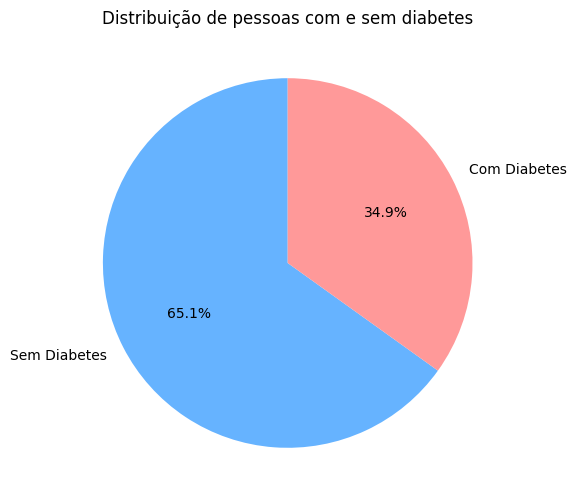

In [ ]:
import matplotlib.pyplot as plt

# Contagem de pessoas com e sem diabetes
counts = df['Outcome'].value_counts()
labels = ['Sem Diabetes', 'Com Diabetes']

# Gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribuição de pessoas com e sem diabetes')
plt.show()


**3.3.Comparação do nível de predisposição genética entre pessoas com e sem diabetes.**

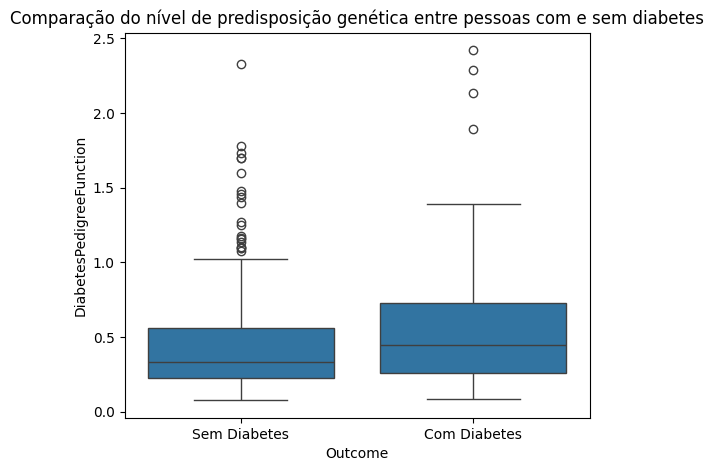

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,5))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.xticks([0,1], ['Sem Diabetes', 'Com Diabetes'])
plt.title('Comparação do nível de predisposição genética entre pessoas com e sem diabetes')
plt.show()


**3.4.Relação idade e diabetes.**

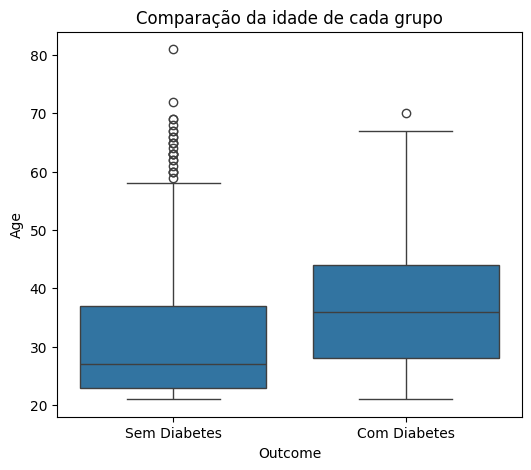

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Outcome', y='Age', data=df)
plt.xticks([0,1], ['Sem Diabetes', 'Com Diabetes'])
plt.title('Comparação da idade de cada grupo')
plt.show()


**3.5.Comparação no nível de glicose de cada grupo**

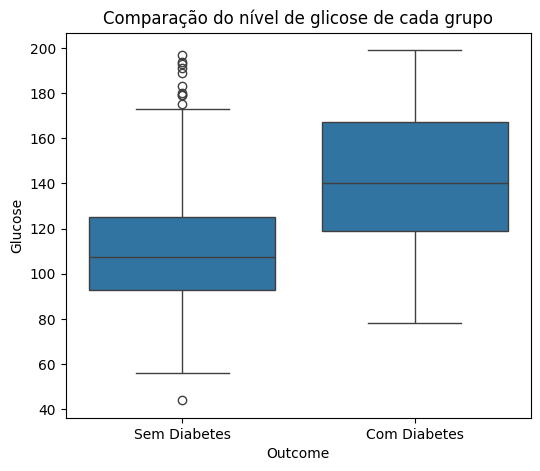

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.xticks([0,1], ['Sem Diabetes', 'Com Diabetes'])
plt.title('Comparação do nível de glicose de cada grupo')
plt.show()


**3.6. Comparação da espessura da prega cutânea de cada grupo.**

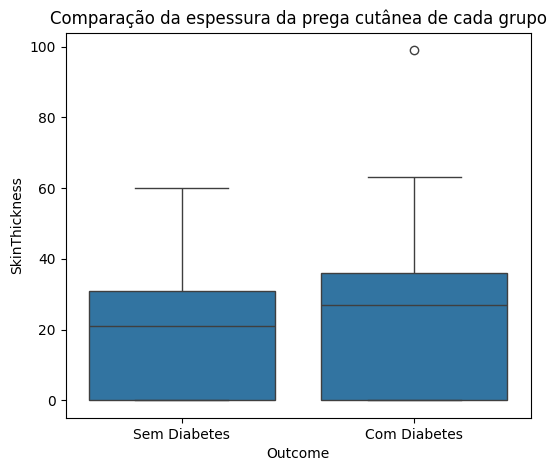

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Outcome', y='SkinThickness', data=df)
plt.xticks([0,1], ['Sem Diabetes', 'Com Diabetes'])
plt.title('Comparação da espessura da prega cutânea de cada grupo')
plt.show()


**3.7.Comparação do índice de massa corporal de cada grupo.**

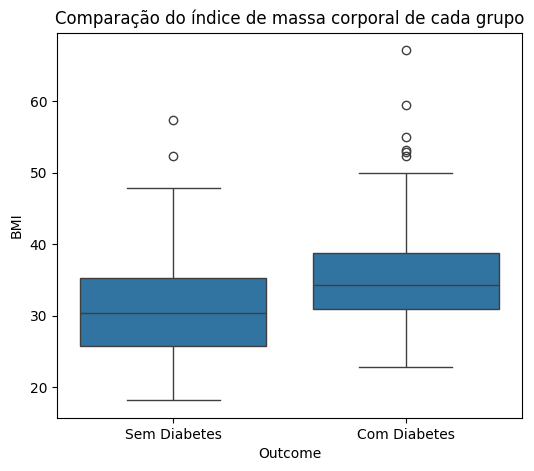

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.xticks([0,1], ['Sem Diabetes', 'Com Diabetes'])
plt.title('Comparação do índice de massa corporal de cada grupo')
plt.show()

**3.8. Comparação da pressão arterial diastólica de cada grupo.**

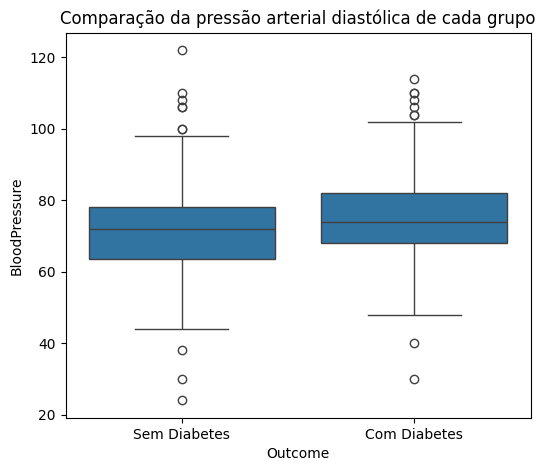

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.xticks([0,1], ['Sem Diabetes', 'Com Diabetes'])
plt.title('Comparação da pressão arterial diastólica de cada grupo')
plt.show()

**Insights:**


*   A maiorias dos pacientes desse dataset, não possue diabetes.
*   Pacientes com um índice de massa corporal maior, tendem a apresentar diabetes

*   Valores mais altos de pressão arterial é mais comum em pacientes com diabetes

*   O nível de glicose mais alto é uma característica presente nos pacientes com diabetes.
*   A idade também é um fator importante, já que os pacientes com diabetes possuem idades maiores do que os sem.

*   A espessura da prega cutânea apresentou pouca diferença entre pacientes com e sem diabetes, indicando que pode não ser um preditor tão relevante











##**4.Divisão Treino/Teste.**

**4.1.Divisão.**

Agora vamos fazer a divisão dos dados e selecionar as variáveis preditoras.

In [ ]:
# Selecionando features (X) e target (y)
features = ["BloodPressure", "DiabetesPedigreeFunction", "Glucose", "Age", "BMI"]
X = df[features]
y = df["Outcome"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


**4.2.Treino/teste**

Após fazer a divisão vamor criar um modelo de aprendizado de máquina  e testa-lo.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Criar o modelo
model = LogisticRegression(max_iter=1000, random_state=42)

# 2. Treinar
model.fit(X_train, y_train)

# 3. Fazer previsões
y_pred = model.predict(X_test)

# 4. Avaliar
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.7402597402597403

Matriz de Confusão:
 [[129  21]
 [ 39  42]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



**Observação**: o modelo está melhor pra prever quem não têm diabetes, isso provavelmente aconteceu porque a base de dados é preenchida majoritariamente por pessoas sem diabetes, representando 65%. Assim, com um material mais robusto da  classe a predição se torna mais acertiva.

##

##**5.Previsão.**

Após criar e testar o modelo, vamos criar um exemplo.

In [ ]:
# Exemplo de paciente
novo_paciente = {
    "BloodPressure": 70,             # pressão arterial
    "DiabetesPedigreeFunction": 0.5, # fator hereditário
    "Glucose": 130,                  # nível de glicose
    "Age": 45,                        # idade
    "BMI": 28.0                       # índice de massa corporal
}
novo_paciente_df = pd.DataFrame([novo_paciente])

In [ ]:
# Previsão
previsao = model.predict(novo_paciente_df)

# Probabilidade
probabilidade = model.predict_proba(novo_paciente_df)

print("Previsão (0 = Sem Diabetes, 1 = Com Diabetes):", previsao[0])
print("Probabilidade de cada classe:", probabilidade[0])


Previsão (0 = Sem Diabetes, 1 = Com Diabetes): 0
Probabilidade de cada classe: [0.66507055 0.33492945]


**Interpretação**: Usando  os valores da glicose, pressão arterial, IMC, idade e predisposição genética do pacientes, o modelo previu 0, logo o paciente não possui diabetes.

##**6.Previsão.**




Identificamos glicose, IMC, idade e predisposição genética como variáveis importantes para prever diabetes.

Criamos um modelo de Regressão Logística, que apresentou ~74% de acurácia.

O modelo é mais confiável para identificar pacientes sem diabetes do que aqueles com diabetes, mostrando que ainda há limitações.

Esse projeto evidencia como a análise de dados pode revelar padrões importantes e apoiar decisões clínicas, mesmo com um dataset pequeno.